# 5. 모델 평가와 성능 향상

## 5.1 교차검증

In [18]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanumgothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import pandas as pd

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [20]:
iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수', scores)

교차 검증 점수 [0.96078431 0.92156863 0.95833333]


In [21]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('교차 검증 점수', scores)

교차 검증 점수 [1.         0.96666667 0.93333333 0.9        1.        ]


In [22]:
print('교차 검증 점수 {:.2f}'.format( scores.mean()))

교차 검증 점수 0.96


In [23]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.00099826, 0.00200653, 0.00099516, 0.00100946, 0.00098467]),
 'score_time': array([0.00099993, 0.00099039, 0.        , 0.        , 0.        ]),
 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]),
 'train_score': array([0.95      , 0.96666667, 0.96666667, 0.975     , 0.95833333])}

In [24]:
res_df = pd.DataFrame(res)
display(res_df.iloc[:,2:])
print('평균시간과 점수:\n', res_df.mean())

,test_score,train_score
0,1.000000,0.950000
1,0.966667,0.966667
2,0.933333,0.966667
3,0.900000,0.975000
4,1.000000,0.958333


평균시간과 점수:
 fit_time       0.001199
score_time     0.000398
test_score     0.960000
train_score    0.963333
dtype: float64


### 계층별 k-cross fold 

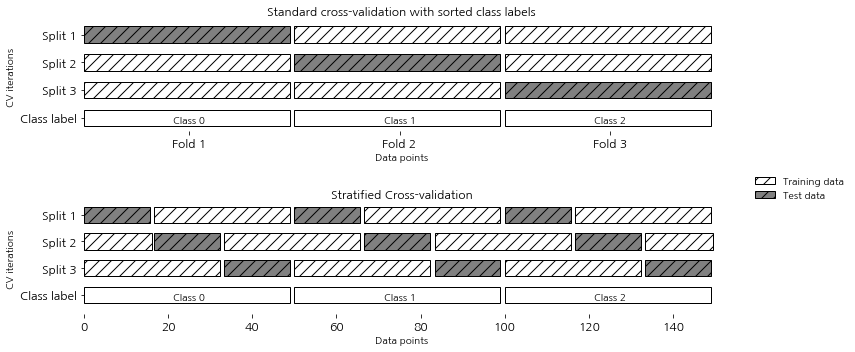

In [25]:
import mglearn
mglearn.plots.plot_stratified_cross_validation()

In [26]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print('교차 검증 스코어:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 스코어:
 [1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [27]:
kfold = KFold(n_splits=3)
print('교차 검증 스코어:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 스코어:
 [0. 0. 0.]


In [33]:
kfold = KFold(n_splits=3, shuffle=True, random_state=526)
print('교차 검증 스코어:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 스코어:
 [0.94 0.92 0.98]


### LOOCV

In [35]:
iris.data.shape

(150, 4)

In [36]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('교차 검증 횟수:',len(scores))
print('교차 검증 평균: {:.2f}\n'.format(scores.mean()))

교차 검증 횟수: 150
교차 검증 평균: 0.95



### 임의 분할 교차 검증

In [42]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수: ',scores)

교차 검증 점수:  [0.90666667 0.88       0.88       0.97333333 0.93333333 0.93333333
 0.94666667 0.93333333 0.96       0.94666667]


In [45]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수\n',scores)

교차 검증 점수
 [0.75       0.8        0.66666667]


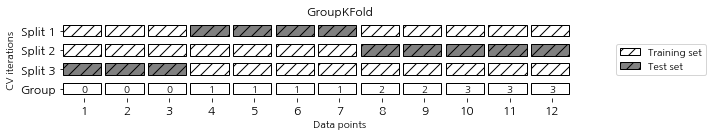

In [48]:
mglearn.plots.plot_group_kfold()

### 반복 교차 검증

In [49]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42, n_repeats=10, n_splits=5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print('교차 검증 점수: \n',scores)
print('교차 검증 평균 점수:{:.3f}'.format(scores.mean()))

교차 검증 점수: 
 [0.96666667 0.96666667 0.96666667 0.93333333 0.96666667 0.86666667
 0.96666667 0.96666667 0.93333333 0.96666667 1.         1.
 0.93333333 0.93333333 0.93333333 1.         0.96666667 0.96666667
 0.9        0.96666667 0.96666667 0.96666667 1.         0.9
 0.96666667 0.93333333 1.         0.96666667 0.96666667 0.93333333
 0.96666667 0.93333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.93333333 0.93333333 0.96666667 1.         0.96666667 0.96666667
 0.86666667 1.         0.93333333 1.         0.96666667 1.
 0.93333333 0.9       ]
교차 검증 평균 점수:0.957


## 5.2 그리드 서치

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
print('Train Size:{} Test Size:{}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            print('Score : {:.3f}'.format(score), 'Parameters : ',{'C':C, 'gamma':gamma} )
            best_parameters = {'C':C, 'gamma':gamma}

print('Best Score : {:.3f}'.format(best_score))
print('Best Parameter : \n',best_parameters)

Train Size:112 Test Size:38
Score : 0.289 Parameters :  {'C': 0.001, 'gamma': 0.001}
Score : 0.974 Parameters :  {'C': 10, 'gamma': 0.001}
Score : 1.000 Parameters :  {'C': 100, 'gamma': 0.001}
Best Score : 1.000
Best Parameter : 
 {'C': 100, 'gamma': 0.001}


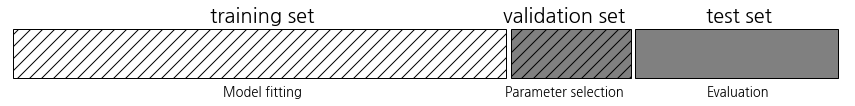

In [64]:
mglearn.plots.plot_threefold_split()

In [68]:
from sklearn.svm import SVC
X_train_val, X_test, y_train_val, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, random_state=1)
print('Train Size:{}, Valid Size:{}, Test Size:{}'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            #print('Score : {:.3f}'.format(score), 'Parameters : ',{'C':C, 'gamma':gamma} )
            best_parameters = {'C':C, 'gamma':gamma}

svm = SVC(**best_parameters)
svm.fit(X_train_val, y_train_val)
test_score = svm.score(X_test, y_test)
print('Best Score in Validation Set: {:.3f}'.format(best_score))
print('Best Parameter : \n',best_parameters)
print('Test Score with optimize parameters: {:.3f}'.format(test_score))

Train Size:84, Valid Size:28, Test Size:38
Best Score in Validation Set: 0.964
Best Parameter : 
 {'C': 10, 'gamma': 0.001}
Test Score with optimize parameters: 0.921


### 교차 검증을 사용한 GridSearch

In [69]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 1, 10, 100]
}

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [80]:
print('Test Score : {:.3f}'.format(grid_search.score(X_test, y_test)))
print('Best Parameter : \n',grid_search.best_params_)
print('Best Score : {:.3f}'.format(grid_search.best_score_))

Test Score : 0.974
Best Parameter : 
 {'C': 100, 'gamma': 0.01}
Best Score : 0.973


In [81]:
print('Best Estimator:\n', grid_search.best_estimator_)

Best Estimator:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [82]:
grid_search.best_estimator_.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [83]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00119171,0.00119858,0.00039854,0.000998688,0.00119991
std_fit_time,0.000384413,0.000398304,0.000488111,0.000631053,0.000417638
mean_score_time,0.000396967,0.000198555,0.000598812,0.000796795,0.000198841
std_score_time,0.000486189,0.00039711,0.000488928,0.000398398,0.000397682
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.375,0.375,0.375,0.375,0.375
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


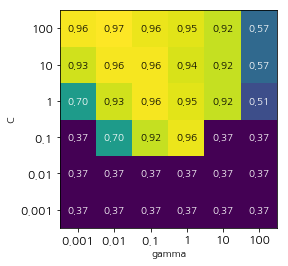

In [86]:
scores = np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', 
                     yticklabels=param_grid['C'], cmap='viridis')

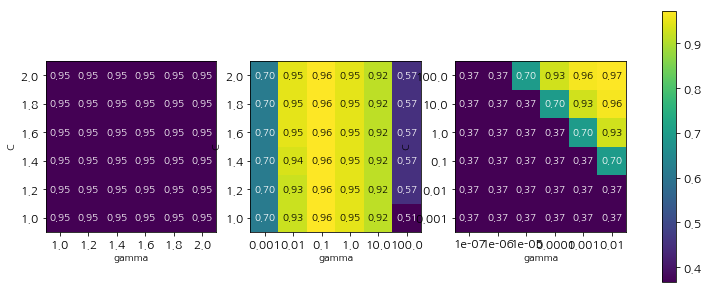

In [93]:
fig, axs = plt.subplots(1,3, figsize=(13,5))
param_grid_linear = {'C':np.linspace(1,2,6), 'gamma': np.linspace(1,2,6)}
param_grid_one_log = {'C':np.linspace(1,2,6), 'gamma': np.logspace(-3,2,6)}
param_grid_range = {'C':np.logspace(-3,2,6), 'gamma': np.logspace(-7,-2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axs):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    score_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], 
        yticklabels=param_grid['C'], cmap='viridis', ax=ax)
plt.colorbar(score_image, ax=axs.tolist())

## 5.3 평가지표와 측정

### 불균형 데이터셋

In [94]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [96]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy ='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("예측된 레이블의 레이블 :", np.unique(pred_most_frequent))
print('테스트 스코어 : {:.2f}'.format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 레이블 : [False]
테스트 스코어 : 0.90


In [97]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('테스트 스코어 : {:.2f}'.format(tree.score(X_test, y_test)))

테스트 스코어 : 0.92


In [99]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 테스트 스코어 : {:.2f}'.format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 테스트 스코어 : {:.2f}'.format(logreg.score(X_test, y_test)))

dummy 테스트 스코어 : 0.81
logreg 테스트 스코어 : 0.98


### 오차 행렬

In [100]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print('Confusion Matrix:\n', confusion)

Confusion Matrix:
 [[401   2]
 [  8  39]]


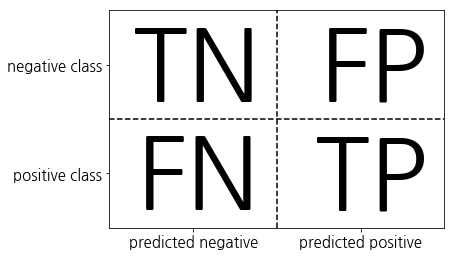

In [101]:
mglearn.plots.plot_binary_confusion_matrix()

In [103]:
print('dummy most-frequent\n',confusion_matrix(y_test, pred_most_frequent))
print('dummy\n',confusion_matrix(y_test, pred_dummy))
print('Tree\n',confusion_matrix(y_test, pred_tree))
print('LogReg\n',confusion_matrix(y_test, pred_logreg))

dummy most-frequent
 [[403   0]
 [ 47   0]]
dummy
 [[360  43]
 [ 39   8]]
Tree
 [[390  13]
 [ 24  23]]
LogReg
 [[401   2]
 [  8  39]]


### 정밀도, 재현율, f-점수

$$ 정밀도 = {TP \over TP + FP} $$

$$ 재현율 = {TP \over TP + FN}$$

$$ F-Score = {2 * {정밀도 * 재현율 \over 정밀도 + 재현율}} $$

In [106]:
from sklearn.metrics import f1_score
print('dummy most-frequent f1 score : {:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('dummy f1 score : {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('Tree f1 score : {:.2f}'.format(f1_score(y_test, pred_tree)))
print('LogReg f1 score : {:.2f}'.format(f1_score(y_test, pred_logreg)))

dummy most-frequent f1 score : 0.00
dummy f1 score : 0.16
Tree f1 score : 0.55
LogReg f1 score : 0.89


In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['Not 9', '9']))

              precision    recall  f1-score   support

       Not 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dummy, target_names=['Not 9', '9']))

              precision    recall  f1-score   support

       Not 9       0.90      0.89      0.90       403
           9       0.16      0.17      0.16        47

   micro avg       0.82      0.82      0.82       450
   macro avg       0.53      0.53      0.53       450
weighted avg       0.82      0.82      0.82       450



In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg, target_names=['Not 9', '9']))

              precision    recall  f1-score   support

       Not 9       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree, target_names=['Not 9', '9']))

              precision    recall  f1-score   support

       Not 9       0.94      0.97      0.95       403
           9       0.64      0.49      0.55        47

   micro avg       0.92      0.92      0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450

